In [14]:
# 1. Import các thư viện cần thiết
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [15]:
# 2. Đọc file csv và gắn index với giá Close
df = pd.read_csv('SHOP.csv')
df1 = df.reset_index()['Close']

In [16]:
# 3. Scaler data
scaler = MinMaxScaler(feature_range=(0, 1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1, 1))

In [17]:
# 4. Chia train test validation
train_size = int(0.7 * len(df1))
test_size = int(0.2 * len(df1))
val_size = len(df1) - train_size - test_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

In [18]:
# 5. Tạo dataset cho mô hình
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_val, y_val = create_dataset(val_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [19]:
# 6. Định nghĩa mô hình Random Forest
model = RandomForestRegressor()

In [20]:
# 7. Huấn luyện mô hình với dữ liệu train
model.fit(X_train, y_train)

RandomForestRegressor()

In [21]:
# 8. Dự đoán giá trị trên tập train, test và validation
train_predict = model.predict(X_train)
y_pred = model.predict(X_test)
y_pred_val = model.predict(X_val)

In [22]:
# 9. Chuẩn hóa dữ liệu dự đoán
train_predict = scaler.inverse_transform(train_predict.reshape(-1, 1))
y_pred = scaler.inverse_transform(y_pred.reshape(-1, 1))
y_pred_val = scaler.inverse_transform(y_pred_val.reshape(-1, 1))

In [23]:
# 10. Đánh giá độ chính xác của mô hình bằng độ lỗi RMSE trên tập validation và test
valid_rmse = np.sqrt(mean_squared_error(y_val, y_pred_val))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

Validation RMSE: 67.22826032705778
Testing RMSE: 42.57962700991611


In [24]:
# 11. Dự báo giá cổ phiếu cho 30 ngày tiếp theo
x_input = val_data[-time_step:].reshape(1, -1)
temp_input = list(x_input[0])
lst_output = []
n_steps = 100
i = 0
while i < 30:
    if len(temp_input) > 100:
        x_input = np.array(temp_input[1:])
        x_input = x_input.reshape(1, -1)
        x_input = x_input.reshape((1, n_steps))
        yhat = model.predict(x_input)
        temp_input.extend(yhat.tolist())
        temp_input = temp_input[1:]
        lst_output.extend(yhat.tolist())
        i += 1
    else:
        x_input = x_input.reshape((1, n_steps))
        yhat = model.predict(x_input)
        temp_input.extend(yhat.tolist())
        lst_output.extend(yhat.tolist())
        i += 1

lst_output = np.array(lst_output).reshape(-1, 1)


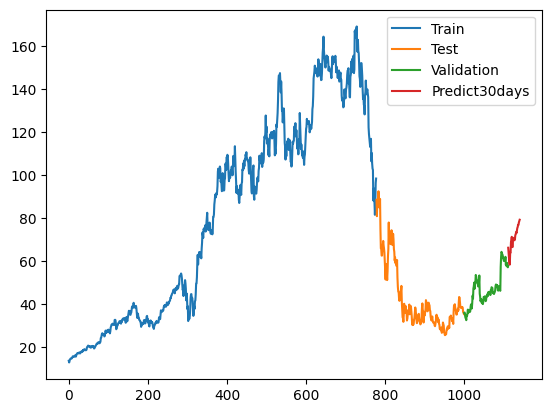

In [29]:
# 12. Vẽ biểu đồ cho dữ liệu train, test, validation và dự đoán cho 30 ngày tiếp theo
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index, scaler.inverse_transform(test_data))
val_data_index = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index, scaler.inverse_transform(val_data))
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index, scaler.inverse_transform(lst_output))
plt.legend(['Train', 'Test', 'Validation', 'Predict30days',''])
plt.show()

ValueError: x and y must have same first dimension, but have shapes (222,) and (121, 1)

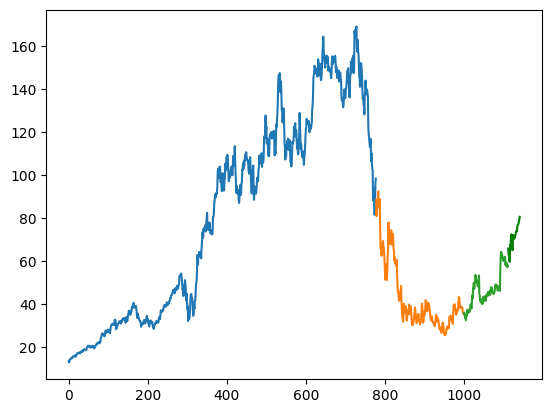

In [45]:
# Vẽ biểu đồ cho dữ liệu train, test, validation, dự đoán và dự đoán cho 30 ngày tiếp theo
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(train_data_index, scaler.inverse_transform(train_data))

test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index, scaler.inverse_transform(test_data))

val_data_index = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index, scaler.inverse_transform(val_data))

prediect_data_index = pd.RangeIndex(start=len(df1), stop=len(df1)+30, step=1)
plt.plot(prediect_data_index, scaler.inverse_transform(lst_output[:30]), color='green')

test_predict_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_predict_index, scaler.inverse_transform(y_pred))

plt.legend(['Train', 'Test', 'Validation', 'Predict30days', 'Test Predict'])
plt.show()
